In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from shapely.geometry import Point, Polygon
import numpy as np

In [7]:
path = 'earthquakes_processed.geojson'
gdf = gpd.read_file(path)
gdf.head()

c:\Users\chira\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
c:\Users\chira\anaconda3\Lib\site-packages\geopandas\io\file.py:403: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore", utc=True)
c:\Users\chira\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
c:\Users\chira\anaconda3\Lib\site-packages\geopandas\io\file.py:403: FutureWarning: errors='ignore' is deprecated and will raise in a future version. 

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2023-01-01T00:49:25.294001+00:00,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us,POINT (178.52180 52.09990)
1,2023-01-01T01:41:43.755001+00:00,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us,POINT (126.73800 7.13970)
2,2023-01-01T03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr,POINT (-66.52510 19.16310)
3,2023-01-01T04:09:32.813999+00:00,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us,POINT (102.76750 -4.78030)
4,2023-01-01T04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us,POINT (-166.94170 53.39650)


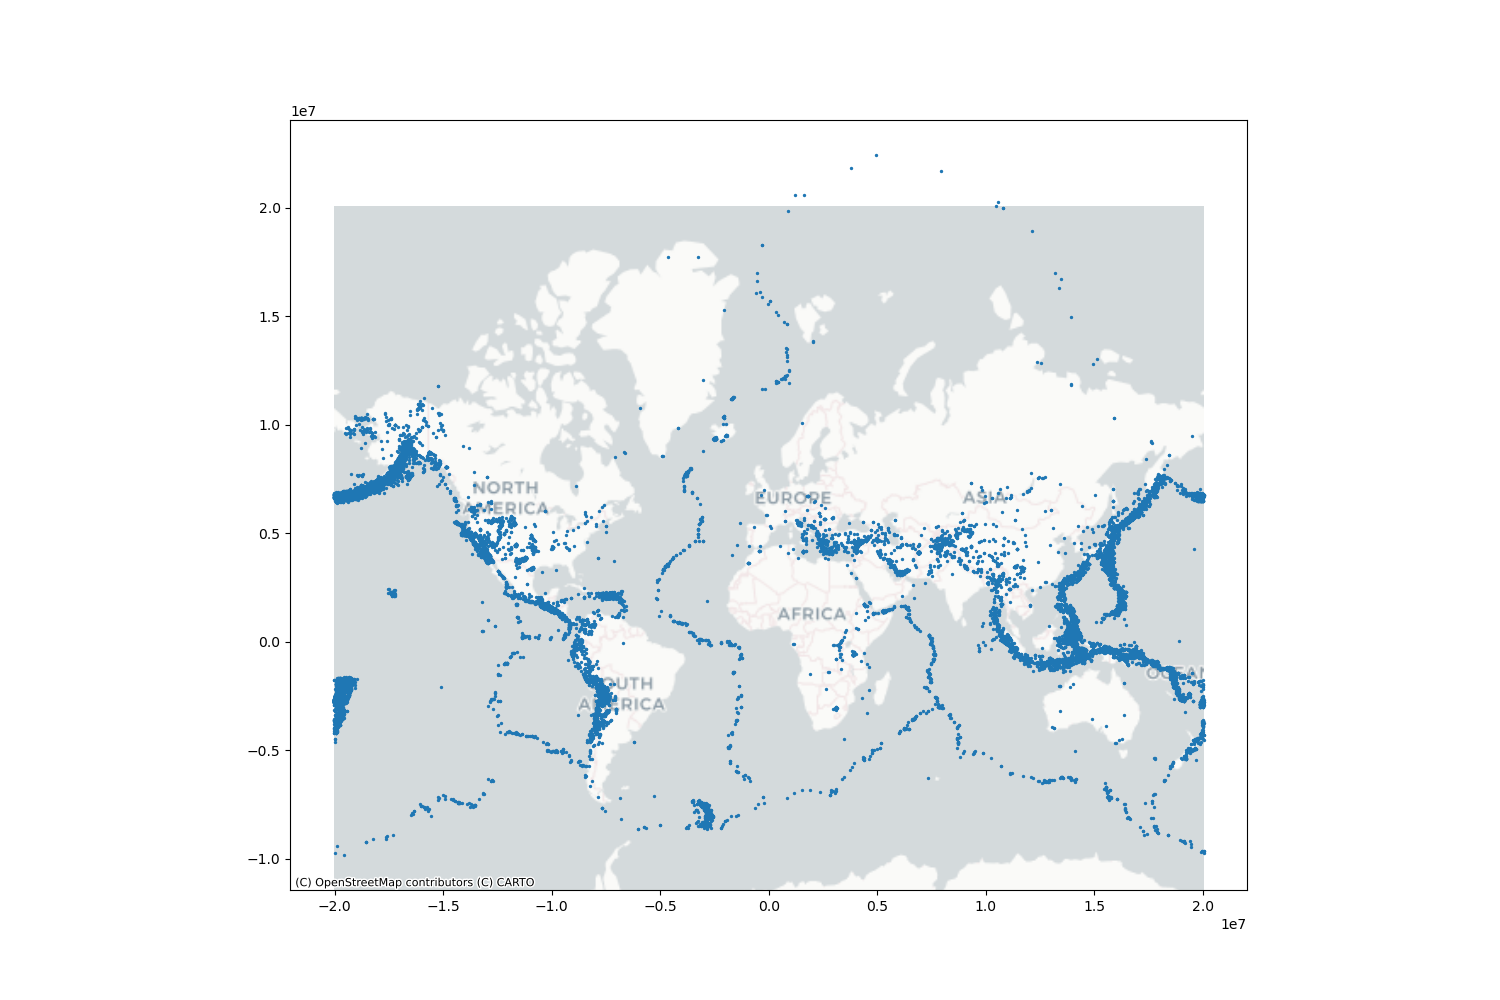

In [8]:
fig, ax = plt.subplots(figsize = (15,10))
gdf.to_crs(epsg=3857).plot(ax = ax, markersize = 2)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

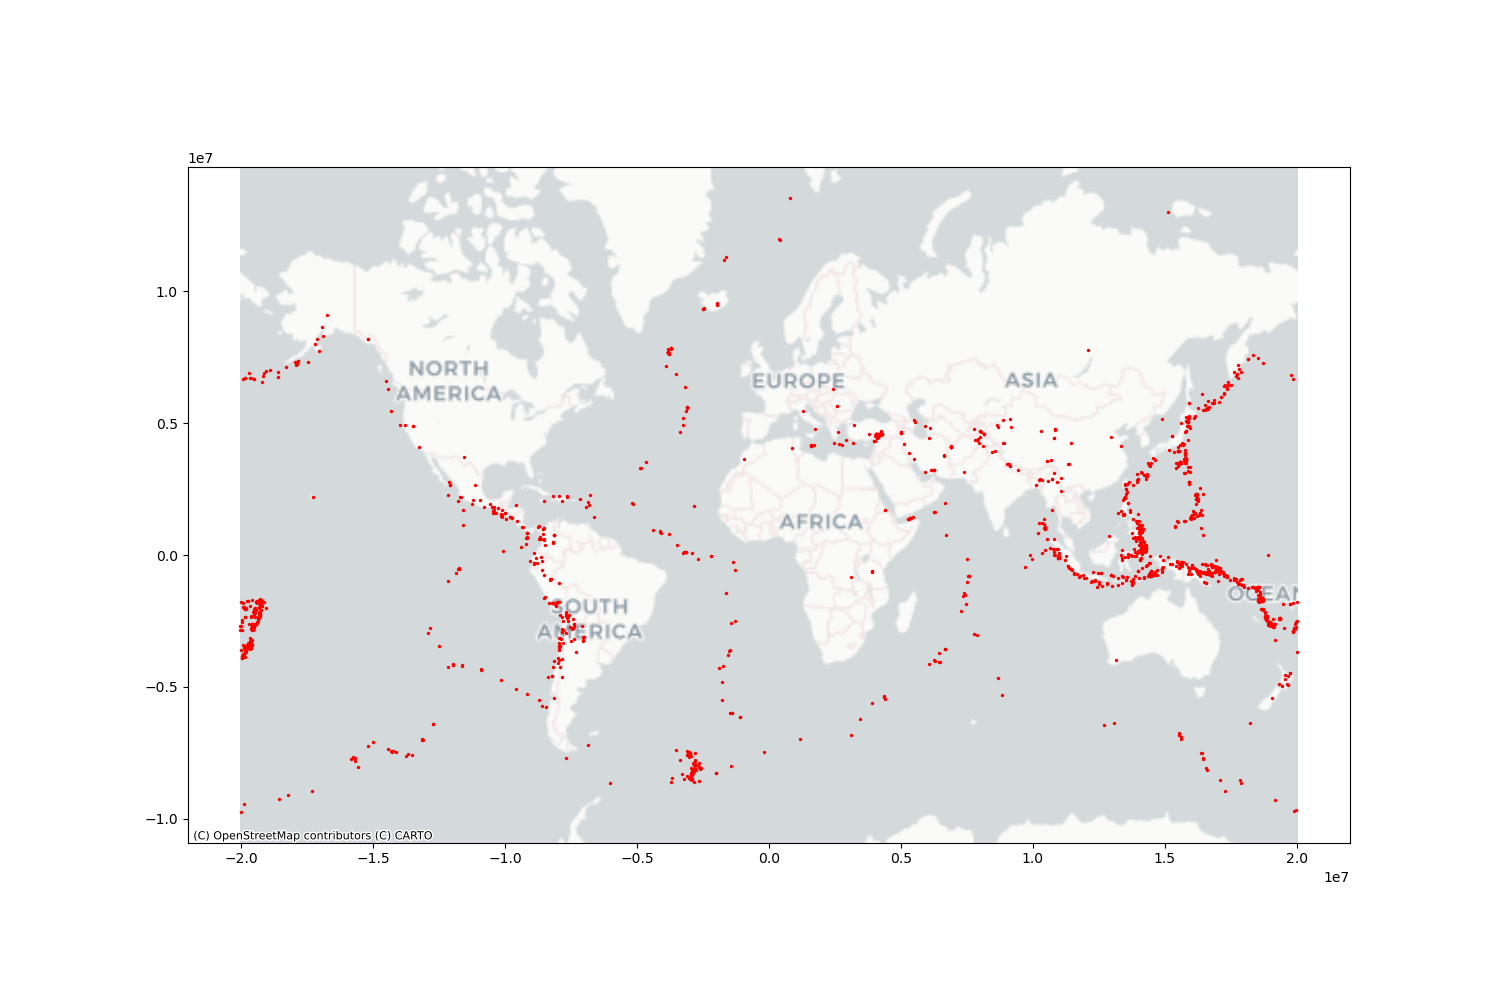

In [9]:
# PLOTTING EARTHQUAKES WITH MAGNITUDE OVER 6.0
magnitude = gdf['mag'] >=6
fig, ax = plt.subplots(figsize = (15,10))
gdf[gdf['mag'] >=5].to_crs(epsg=3857).plot(ax = ax, markersize = 2, color = 'red')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

in this section I wanted to create a new column which classifies each earthquake reading

In [10]:
# first create the column and assign a placement value
# next create a condition for the column based on each value using .loc
# but this works best for binary classification
# gdf['Magnitude_class'] = 'Strong'
# gdf.loc[gdf['mag'] >= 5.0, 'Magnitude_class'] = 'Massive'
# gdf.head()

In [11]:
# create 2 lists one for the conditions and the other for the values
conditions = [
    (gdf['mag'] <= 3),
    ((gdf['mag'] >= 3) & (gdf['mag'] <= 4)),
    ((gdf['mag'] >= 4) & (gdf['mag'] <= 5)),
    ((gdf['mag'] >= 5) & (gdf['mag'] <= 6)),
    ((gdf['mag'] >= 6) & (gdf['mag'] <= 7)),
    ((gdf['mag'] >= 7) & (gdf['mag'] <= 8)),
    (gdf['mag'] >= 8)
]

values = [
    'Micro',
    'Minor',
    'Light',
    'Moderate',
    'Strong',
    'Major',
    'Great'
]

In [12]:
gdf['Magnitude_class'] = np.select(conditions, values)
gdf.head(100)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry,Magnitude_class
0,2023-01-01T00:49:25.294001+00:00,52.099900,178.521800,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,earthquake,8.46,21.213,0.097000,14.0,reviewed,us,us,POINT (178.52180 52.09990),Minor
1,2023-01-01T01:41:43.755001+00:00,7.139700,126.738000,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,earthquake,5.51,7.445,0.083000,43.0,reviewed,us,us,POINT (126.73800 7.13970),Light
2,2023-01-01T03:29:31.070000+00:00,19.163100,-66.525100,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,earthquake,0.91,15.950,0.090000,16.0,reviewed,pr,pr,POINT (-66.52510 19.16310),Minor
3,2023-01-01T04:09:32.813999+00:00,-4.780300,102.767500,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,earthquake,10.25,6.579,0.238000,5.0,reviewed,us,us,POINT (102.76750 -4.78030),Light
4,2023-01-01T04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,earthquake,1.41,1.999,0.085000,18.0,reviewed,us,us,POINT (-166.94170 53.39650),Micro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-01-02T09:57:49.953999+00:00,16.095500,-95.574500,41.488,4.10,mb,63.0,99.0,0.6070,1.08,...,earthquake,4.25,7.828,0.069000,57.0,reviewed,us,us,POINT (-95.57450 16.09550),Light
96,2023-01-02T10:36:41.973999+00:00,60.261400,-153.429000,159.200,2.70,ml,NaN,NaN,NaN,0.58,...,earthquake,NaN,0.300,NaN,NaN,reviewed,ak,ak,POINT (-153.42900 60.26140),Micro
97,2023-01-02T10:57:53.639999+00:00,19.145667,-67.251000,32.020,3.09,md,10.0,298.0,0.6875,0.41,...,earthquake,2.11,13.140,0.040243,6.0,reviewed,pr,pr,POINT (-67.25100 19.14567),Minor
98,2023-01-02T11:24:04.950000+00:00,17.961333,-67.004667,8.090,2.85,md,14.0,200.0,0.0385,0.19,...,earthquake,0.52,0.910,0.149448,11.0,reviewed,pr,pr,POINT (-67.00467 17.96133),Micro


In [13]:
gdf[gdf.loc[:, "mag"] > 6] [['mag', 'Magnitude_class']]

,mag,Magnitude_class
19355,7.0,Strong
19384,7.6,Major
19511,6.1,Strong
19516,6.3,Strong
19559,7.0,Strong
...,...,...
26331,6.1,Strong
26505,6.2,Strong
26515,6.1,Strong
26534,6.1,Strong


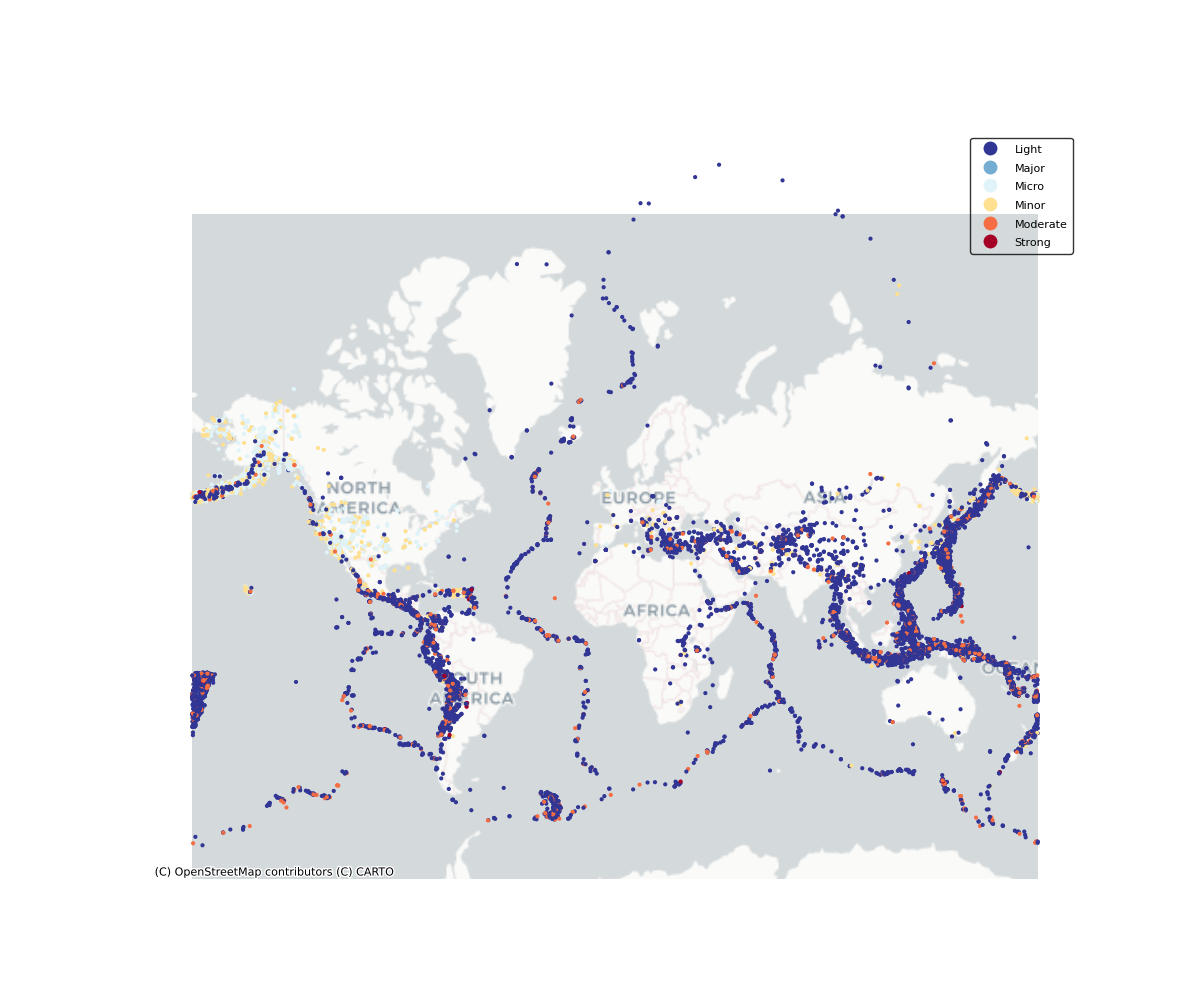

In [16]:

ax = gdf.to_crs(epsg=3857).plot(column = 'Magnitude_class', figsize = (12,10), markersize = 4, legend = True, cmap = 'RdYlBu_r')
ax.axis('off')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
legend = ax.get_legend()
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('black')
for text in legend.get_texts():
    text.set_fontsize('8')

In [ ]:
gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry,Magnitude_class
0,2023-01-01T00:49:25.294001+00:00,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,earthquake,8.46,21.213,0.097,14.0,reviewed,us,us,POINT (178.52180 52.09990),Minor
1,2023-01-01T01:41:43.755001+00:00,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,earthquake,5.51,7.445,0.083,43.0,reviewed,us,us,POINT (126.73800 7.13970),Light
2,2023-01-01T03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr,POINT (-66.52510 19.16310),Minor
3,2023-01-01T04:09:32.813999+00:00,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,earthquake,10.25,6.579,0.238,5.0,reviewed,us,us,POINT (102.76750 -4.78030),Light
4,2023-01-01T04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,earthquake,1.41,1.999,0.085,18.0,reviewed,us,us,POINT (-166.94170 53.39650),Micro


C:\Users\chira\AppData\Local\Temp\ipykernel_19672\2632299211.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


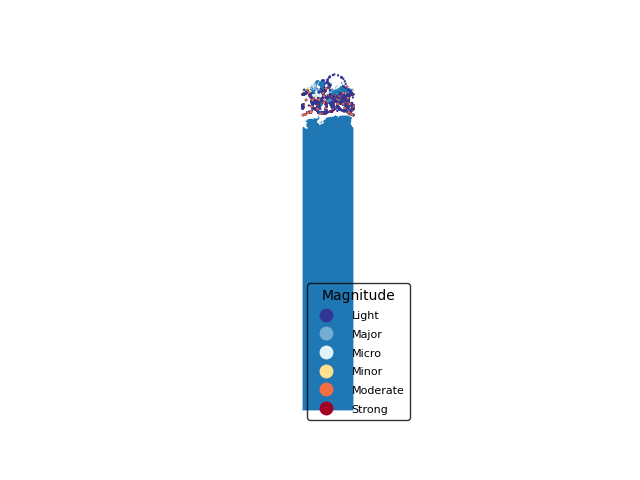

In [50]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(epsg=3857).plot(ax=ax)
gdf.to_crs(epsg=3857).plot(ax = ax, markersize = 0.5, column = 'Magnitude_class', cmap='RdYlBu_r', legend = True)
ax.axis('off');
legend = ax.get_legend()
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('black')
legend.set_title('Magnitude')
for text in legend.get_texts():
    text.set_fontsize('8')

In [51]:
gdf.to_csv('Earthquakes_2nd_processing')

In [55]:
classes = gdf['Magnitude_class'].value_counts()
classes

Magnitude_class
Light       15406
Micro        5303
Minor        4577
Moderate     1236
Strong        106
Major          14
Name: count, dtype: int64

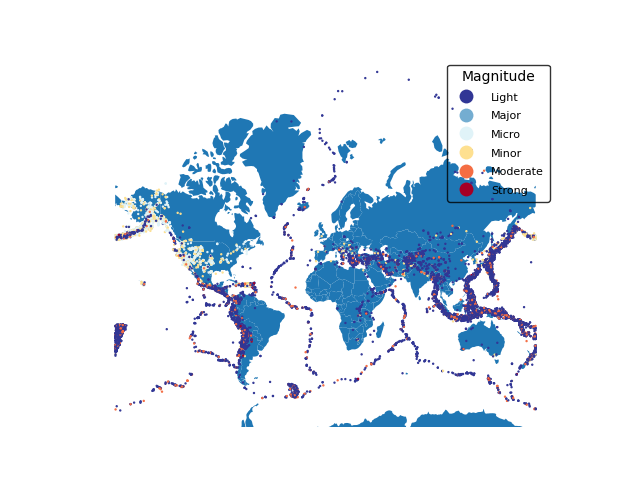

In [61]:
plt.bar(x='Magnitude_class', height='mag', data = gdf)
plt.show()

In [62]:
# pie chart
plt.pie('mag', labels='Magnitude_class', data=gdf);